# Preparação de bibliotecas

In [2]:
!pip install livelossplot
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


# Autoencoder_mnist_simples

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras import backend as K
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
%matplotlib inline

In [0]:
#para melhor gestão memória GPU por parte do tensorflow
def set_keras_backend(backend):
    print("A acertar o backend e libertar memória da grafica")
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend
    if backend == "tensorflow":
        K.get_session().close()
        cfg = K.tf.ConfigProto()
        cfg.gpu_options.allow_growth = True
        #cfg.gpu_options.allocator_type = 'BFC'
        K.set_session(K.tf.Session(config=cfg))
def limit_mem():
    K.get_session().close()
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))
    set_keras_backend("tensorflow")

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


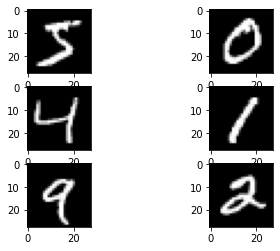

(60000, 784)
(10000, 784)


In [11]:
def load_mnist_dataset(path='mnist.npz'):
    #path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
    # Visualizar 6 imagens do mnist numa escala de cinzentos
    
def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()

def data_preparation_2D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][largura * altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    return X_train, X_test, y_train, y_test, num_classes

def data_preparation_1D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
    num_pixels = X_train.shape[1] * X_train.shape[2] #ou np.prod(X_train.shape[1:])
    X_train = X_train.reshape(len(X_train), num_pixels)
    X_test = X_test.reshape(len(X_test), num_pixels)
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print(X_train.shape)
    print(X_test.shape)
    return X_train, X_test, y_train, y_test, num_classes

#X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
X_train, X_test, y_train, y_test, num_classes = data_preparation_1D()

In [12]:
def create_Autoencoder():
    input_image= Input(shape=(784,))
    encoded = Dense(units=32, activation='relu')(input_image)
    decoded = Dense(units=784, activation='sigmoid')(encoded)
    encoder = Model(inputs=input_image, outputs=encoded) #só até gargalo na rede entre a
    autoencoder = Model(inputs=input_image, outputs=decoded)
    return autoencoder, encoder

(autoencoder, encoder) = create_Autoencoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### ENCODER + DECODER #################")
autoencoder.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

############### ENCODER #################
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________

############### ENCODER + DECODER #################
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2512

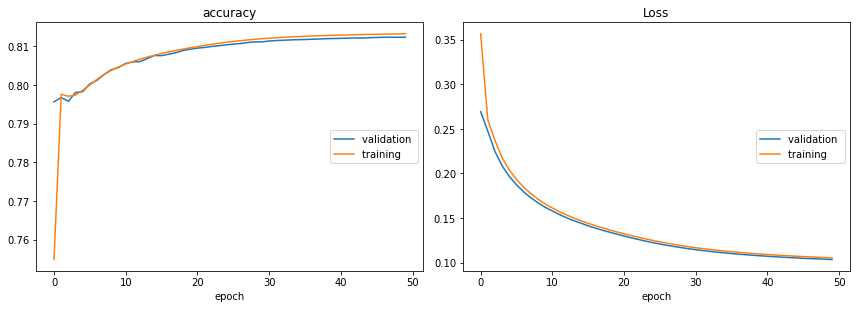

accuracy
	validation       	 (min:    0.796, max:    0.812, cur:    0.812)
	training         	 (min:    0.755, max:    0.813, cur:    0.813)
Loss
	validation       	 (min:    0.104, max:    0.269, cur:    0.104)
	training         	 (min:    0.105, max:    0.356, cur:    0.105)
Scores:  [0.10362852494716644, 0.8124085664749146]
Erro autoencoder: 18.76%


In [13]:
def compiletrain(autoencoder, X_train, X_test):
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
    history = autoencoder.fit(X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=0,
    callbacks=[PlotLossesKeras()])
    # Avaliação final com os casos de teste
    scores = autoencoder.evaluate(X_test, X_test, verbose=0)
    print('Scores: ', scores)
    print("Erro autoencoder: %.2f%%" % (100-scores[1]*100))
    return autoencoder,history

(autoencoder,history)=compiletrain(autoencoder, X_train, X_test)

Original Images - first 10 images of X_test


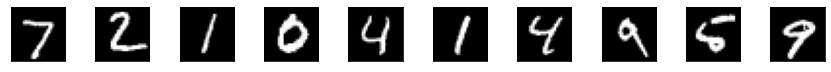

Encoded Images - first 10 images of X_test


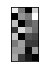

Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


Decoded Images - first 10 images of X_test


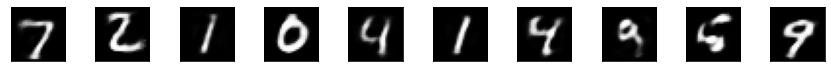

In [15]:
def visualize_predictions(encoder,autoencoder,X_test):
    encoded_images = encoder.predict(X_test)
    predicted_images = autoencoder.predict(X_test)
    # Original Images
    print("Original Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    # display Encoded Images (latent space)
    print("Encoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(encoded_images[i].reshape(8,4))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.show()
        # display Decoded Images
        print("Decoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i+ 1)
        plt.imshow(predicted_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

visualize_predictions(encoder,autoencoder,X_test)

#Autoencoder_mnist_deep

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras.utils import np_utils
from tensorflow.keras import backend as K
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
%matplotlib inline

In [0]:
##para melhor gestão memória GPU por parte do tensorflow
#def set_keras_backend(backend):
#    print("A acertar o backend e libertar memória da grafica")
#    if K.backend() != backend:
#        os.environ['KERAS_BACKEND'] = backend
#        importlib.reload(K)
#        assert K.backend() == backend
#    if backend == "tensorflow":
#        #K.get_session().close()
#        cfg = K.ConfigProto()
#        cfg.gpu_options.allow_growth = True
#        #cfg.gpu_options.allocator_type = 'BFC'
#        K.set_session(K.tf.Session(config=cfg))
#def limit_mem():
#    K.get_session().close()
#    cfg = K.tf.ConfigProto()
#    cfg.gpu_options.allow_growth = True
#    K.set_session(K.tf.Session(config=cfg))
#
#set_keras_backend("tensorflow")

(60000, 28, 28)


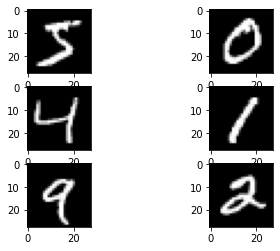

(60000, 784)
(10000, 784)


In [18]:
def load_mnist_dataset(path='mnist.npz'):
    #path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
# Visualizar 6 imagens do mnist numa escala de cinzentos
def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()

def data_preparation_2D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][largura * altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    return X_train, X_test, y_train, y_test, num_classes

def data_preparation_1D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
    num_pixels = X_train.shape[1] * X_train.shape[2] #ou np.prod(X_train.shape[1:])
    X_train = X_train.reshape(len(X_train), num_pixels) #faz o (28,28) = 784
    X_test = X_test.reshape(len(X_test), num_pixels)
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print(X_train.shape)
    print(X_test.shape)
    return X_train, X_test, y_train, y_test, num_classes

#X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
X_train, X_test, y_train, y_test, num_classes = data_preparation_1D()

In [19]:
#função de ativação relu para não-linearidade e no final sigmoid pois quero a probabili
def create_Autoencoder():
    input_image= Input(shape=(784,))
    encoded1 = Dense(units=128, activation='relu')(input_image)
    encoded2 = Dense(units=64, activation='relu')(encoded1)
    encoded_final = Dense(units=32, activation='relu')(encoded2)
    decoded1 = Dense(units=64, activation='relu')(encoded_final)
    decoded2 = Dense(units=128, activation='relu')(decoded1)
    decoded_final = Dense(units=784, activation='sigmoid')(decoded2)
    encoder = Model(inputs=input_image, outputs=encoded_final) #só até gargalo na rede
    autoencoder = Model(inputs=input_image, outputs=decoded_final)
    return autoencoder, encoder

(autoencoder, encoder) = create_Autoencoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### ENCODER + DECODER #################")
autoencoder.summary()


############### ENCODER #################
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________

############### ENCODER + DECODER #################
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 

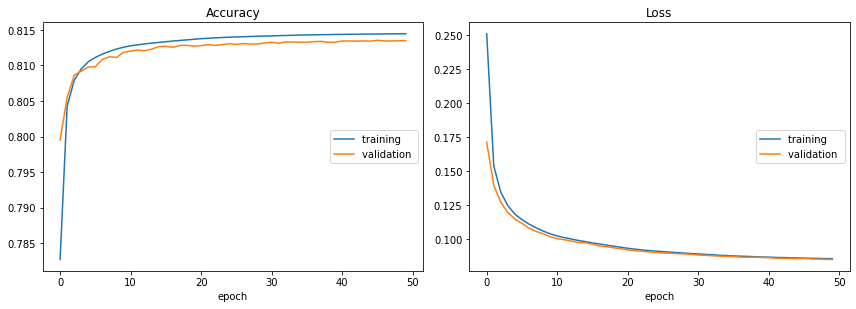

Accuracy
	training         	 (min:    0.783, max:    0.814, cur:    0.814)
	validation       	 (min:    0.800, max:    0.814, cur:    0.813)
Loss
	training         	 (min:    0.086, max:    0.356, cur:    0.086)
	validation       	 (min:    0.085, max:    0.269, cur:    0.085)
Scores:  [0.08526384394168854, 0.81347543]
Erro autoencoder: 18.65%


In [20]:
def compiletrain(autoencoder, X_train, X_test):
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = autoencoder.fit(X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=0,
    callbacks=[PlotLossesKeras()])
    # Avaliação final com os casos de teste
    scores = autoencoder.evaluate(X_test, X_test, verbose=0)
    print('Scores: ', scores)
    print("Erro autoencoder: %.2f%%" % (100-scores[1]*100))
    return autoencoder,history

(autoencoder,history)=compiletrain(autoencoder, X_train, X_test)

Original Images - first 10 images of X_test


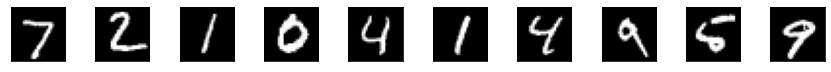

Encoded Images - first 10 images of X_test


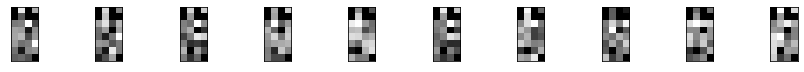

Decoded Images - first 10 images of X_test


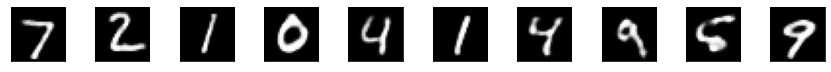

In [21]:
def visualize_predictions(encoder,autoencoder,X_test):
    encoded_images = encoder.predict(X_test)
    predicted_images = autoencoder.predict(X_test)
    # Original Images
    print("Original Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    # display Encoded Images (latent space)
    print("Encoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(encoded_images[i].reshape(8,4))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    # display Decoded Images
    print("Decoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i+ 1)
        plt.imshow(predicted_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
visualize_predictions(encoder,autoencoder,X_test)

# Autoencoder_mnist_denoise

In [0]:
#from keras.datasets import mnist
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
%matplotlib inline

In [0]:
##para melhor gestão memória GPU por parte do tensorflow
#def set_keras_backend(backend):
#    print("A acertar o backend e libertar memória da grafica")
#    if K.backend() != backend:
#        os.environ['KERAS_BACKEND'] = backend
#        importlib.reload(K)
#        assert K.backend() == backend
#    if backend == "tensorflow":
#        K.get_session().close()
#        cfg = K.tf.ConfigProto()
#        cfg.gpu_options.allow_growth = True
#        #cfg.gpu_options.allocator_type = 'BFC'
#        K.set_session(K.tf.Session(config=cfg))
#def limit_mem():
#    K.get_session().close()
#    cfg = K.tf.ConfigProto()
#    cfg.gpu_options.allow_growth = True
#    K.set_session(K.tf.Session(config=cfg))
#
#set_keras_backend("tensorflow")

(60000, 28, 28)


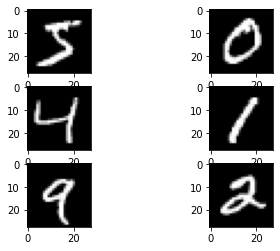

(60000, 784)
(10000, 784)
(60000, 28, 28)


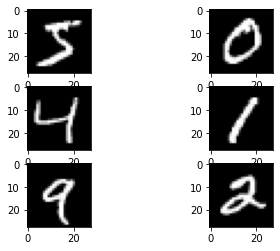

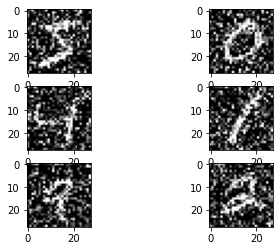

(60000, 784)
(10000, 784)


In [24]:
def load_mnist_dataset(path='mnist.npz'):
    #path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
# Visualizar 6 imagens do mnist numa escala de cinzentos
def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()
def data_preparation_2D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][largura * altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    return X_train, X_test, y_train, y_test, num_classes

def data_preparation_1D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
    num_pixels = X_train.shape[1] * X_train.shape[2] #ou np.prod(X_train.shape[1:])
    X_train = X_train.reshape(len(X_train), num_pixels) #faz o (28,28) = 784
    X_test = X_test.reshape(len(X_test), num_pixels)
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print(X_train.shape)
    print(X_test.shape)
    return X_train, X_test, y_train, y_test, num_classes
#acrescentar ruido nas imagens

def data_preparation_1D_ruido():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
    num_pixels = X_train.shape[1] * X_train.shape[2] #ou np.prod(X_train.shape[1:])
    X_train = X_train.reshape(len(X_train), num_pixels) #faz o (28,28) = 784
    X_test = X_test.reshape(len(X_test), num_pixels)
    #somar ao X_tarin valores aleatorios com distribuição normal centro em 0 e largura 0
    X_train_ruido = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
    X_train_ruido = np.clip(X_train_ruido, 0., 1.) #para podar os valores menores do que
    X_test_ruido = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
    X_test_ruido = np.clip(X_test_ruido, 0., 1.)
    visualize_mnist(X_train_ruido.reshape(len(X_train),28,28))
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print(X_train.shape)
    print(X_test.shape)
    return X_train_ruido, X_test_ruido, y_train, y_test, num_classes

#X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
X_train, X_test, y_train, y_test, num_classes = data_preparation_1D()
#X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
X_train_ruido, X_test_ruido, y_train, y_test, num_classes = data_preparation_1D_ruido()

In [25]:
#função de ativação relu para não-linearidade e no final sigmoid pois quero a probabili
def create_Autoencoder():
    input_image= Input(shape=(784,))
    encoded1 = Dense(units=128, activation='relu')(input_image)
    encoded2 = Dense(units=64, activation='relu')(encoded1)
    encoded_final = Dense(units=32, activation='relu')(encoded2)
    decoded1 = Dense(units=64, activation='relu')(encoded_final)
    decoded2 = Dense(units=128, activation='relu')(decoded1)
    decoded_final = Dense(units=784, activation='sigmoid')(decoded2)
    encoder = Model(inputs=input_image, outputs=encoded_final) #só até gargalo na rede
    autoencoder = Model(inputs=input_image, outputs=decoded_final)
    return autoencoder, encoder
    
(autoencoder, encoder) = create_Autoencoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### ENCODER + DECODER #################")
autoencoder.summary()


############### ENCODER #################
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________

############### ENCODER + DECODER #################
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_

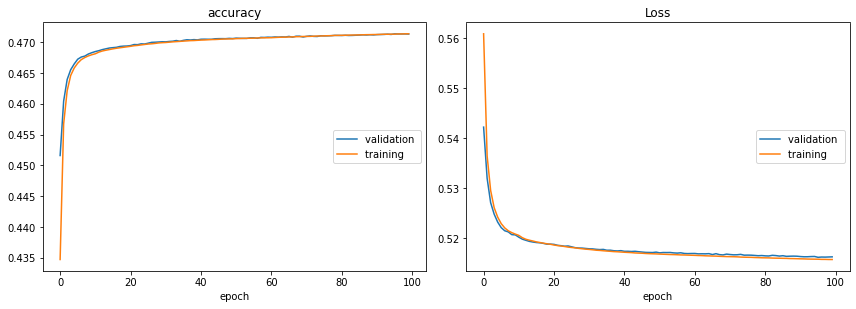

accuracy
	validation       	 (min:    0.452, max:    0.812, cur:    0.471)
	training         	 (min:    0.435, max:    0.813, cur:    0.471)
Loss
	validation       	 (min:    0.085, max:    0.542, cur:    0.516)
	training         	 (min:    0.086, max:    0.561, cur:    0.516)

Epoch 00100: val_accuracy did not improve from 0.47134
10000/10000 [==============================] - 1s 66us/step
Scores:  [0.5163405529022217, 0.4713099002838135]
Erro autoencoder: 52.87%


In [26]:
def compiletrain(autoencoder, X_train, X_test):
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)
    history = autoencoder.fit(X_train, X_train, 
                              epochs=100, 
                              batch_size=256, 
                              shuffle=True, 
                              validation_data=(X_test, X_test), 
                              verbose=0,
                              callbacks=[PlotLossesKeras(),checkpointer])
    # Avaliação final com os casos de teste
    scores = autoencoder.evaluate(X_test, X_test, verbose=1)
    print('Scores: ', scores)
    print("Erro autoencoder: %.2f%%" % (100-scores[1]*100))
    autoencoder.load_weights('best_weights.hdf5')
    return autoencoder,history

(autoencoder,history)=compiletrain(autoencoder, X_train_ruido, X_test_ruido)

Original Images - first 10 images of X_test


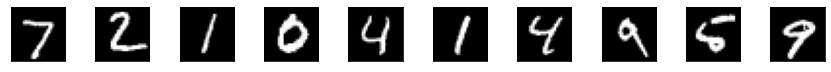

Original Images com ruído - first 10 images of X_test


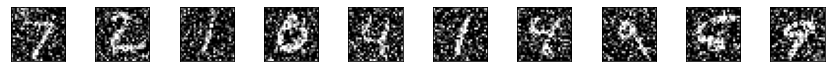

Encoded Images - first 10 images of X_test


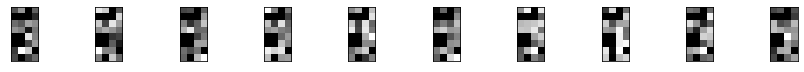

Decoded Images - first 10 images of X_test


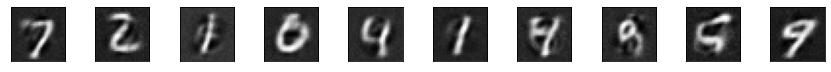

In [28]:
def visualize_predictions(encoder,autoencoder,X_test):
    encoded_images = encoder.predict(X_test_ruido)
    predicted_images = autoencoder.predict(X_test_ruido)
    # Original Images
    print("Original Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    # Original Images com ruído
    print("Original Images com ruído - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(X_test_ruido[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    # display Encoded Images (latent space)
    print("Encoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(encoded_images[i].reshape(8,4))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    # display Decoded Images
    print("Decoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i+ 1)
        plt.imshow(predicted_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
visualize_predictions(encoder,autoencoder,X_test)

# VAE_create_model

In [0]:
import keras
from keras import backend as K
#from keras import layers
from keras.layers import Input, Dense, Flatten, Conv2D, Reshape, Conv2DTranspose, Lambda
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from livelossplot import PlotLossesKeras
%matplotlib inline

In [0]:
##para melhor gestão memória GPU por parte do tensorflow
#def set_keras_backend(backend):
#    print("A acertar o backend e libertar memória da grafica")
#    if K.backend() != backend:
#        os.environ['KERAS_BACKEND'] = backend
#        importlib.reload(K)
#        assert K.backend() == backend
#    if backend == "tensorflow":
#        K.get_session().close()
#        cfg = K.tf.ConfigProto()
#        1cfg.gpu_options.allow_growth = True
#        #cfg.gpu_options.allocator_type = 'BFC'
#        K.set_session(K.tf.Session(config=cfg))
#def limit_mem():
#    K.get_session().close()
#    cfg = K.tf.ConfigProto()
#    cfg.gpu_options.allow_growth = True
#    K.set_session(K.tf.Session(config=cfg))
#
#set_keras_backend("tensorflow")

(60000, 28, 28)


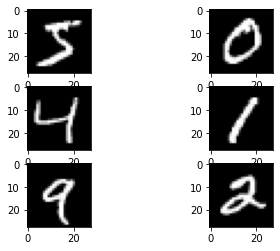

shape[0]:  60000
shape antes:  (60000, 28, 28)
shape depois:  (60000, 28, 28, 1)


In [31]:
def load_mnist_dataset(path='mnist.npz'):
    #path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
# Visualizar 6 imagens do mnist numa escala de cinzentos

def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()
    
def data_preparation_2D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][largura * altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    #y_train = np_utils.to_categorical(y_train)
    #y_test = np_utils.to_categorical(y_test)
    num_classes = 10 # y_test.shape[1]
    return X_train, X_test, y_train, y_test, num_classes

X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()

In [33]:
def create_encoder():
    input_image= Input(shape=(28, 28, 1)) #imagens do MNIST
    encoded1 = Conv2D(32, 3, padding='same', activation='relu')(input_image)
    encoded2 = Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(encoded1)
    encoded3 = Conv2D(64, 3, padding='same', activation='relu')(encoded2)
    encoded4 = Conv2D(64, 3, padding='same', activation='relu')(encoded3)
    encoded5 = Flatten()(encoded4)
    encoded6 = Dense(32, activation='relu')(encoded5)
    t_mean = Dense(2)(encoded6) #o 2 refere-se à dimensão do latent space
    t_log_var = Dense(2)(encoded6)
    #ver documentação do keras:
    #Output of the created model are the sufficient statistics
    #of the variational distriution q(t|x;phi), mean and log variance.
    encoder = Model(inputs=input_image, outputs=[t_mean, t_log_var], name='encoder')
    return encoder

def create_decoder():
    decoder_input = Input(shape=(2,)) #o 2 refere-se à dimensão do latent space (samplin
    decoded1 = Dense(12544, activation='relu')(decoder_input) #12544 = 14*14*64
    decoded2 = Reshape((14, 14, 64))(decoded1)
    decoded3 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(decoded2)
    decoded4 = Conv2D(1, 3, padding='same', activation='sigmoid')(decoded3)
    #Outputs são imagens com shape (28, 28, 1) onde o valor de cada pixel corresponde à
    decoder = Model(inputs=decoder_input, outputs=decoded4, name='decoder')
    return decoder

encoder = create_encoder()
decoder = create_decoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### DECODER #################")
decoder.summary()


############### ENCODER #################
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 28, 28, 32)   320         input_15[0][0]                   
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 14, 14, 64)   18496       conv2d_26[0][0]                  
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 14, 14, 64)   36928       conv2d_27[0][0]                  
_________________________________________________

In [34]:
#código baseado no exemplo da documentação do keras
def sample(args):
    '''
    Draws samples from a standard normal and scales the samples with
    standard deviation of the variational distribution and shifts them
    by the mean.
    Args: sufficient statistics of the variational distribution.
    Returns: Samples from the variational distribution.
    '''
    t_mean, t_log_var = args
    t_sigma = K.sqrt(K.exp(t_log_var))
    epsilon = K.random_normal(shape=K.shape(t_mean), mean=0., stddev=1.)
    return t_mean + t_sigma * epsilon
#Lambda layers in Keras help you to implement layers or functionality that is not prebui
#and which do not require trainable weights.

def create_sampler(): #Creates a sampling layer.
    return Lambda(sample, name='sampler') #Lambda refer-se ao layer.Lambda
    
def create_vae():
    input_image = Input(shape=(28, 28, 1))
    t_mean, t_log_var = encoder(input_image)
    t = sampler([t_mean, t_log_var]) #novo layer para fazer o sampling
    t_decoded = decoder(t)
    vae = Model(input_image, t_decoded, name='vae')
    return vae, t_mean, t_log_var

sampler = create_sampler()
vae,t_mean, t_log_var = create_vae()
print("\n############### VARIATIONAL AUTOENCODER #################")
vae.summary()


############### VARIATIONAL AUTOENCODER #################
Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 494244      input_17[0][0]                   
__________________________________________________________________________________________________
sampler (Lambda)                (None, 2)            0           encoder[1][0]                    
                                                                 encoder[1][1]                    
__________________________________________________________________________________________________
decoder (Model)                 (None

In [0]:
#ver documentação do keras (variational autoencoders)
def neg_variational_lower_bound(input_image, t_decoded):
    '''
    Negative variational lower bound used as loss function
    for training the variational auto-encoder.
    Args: input_image: input images
    t_decoded: reconstructed images
    '''
    # Reconstruction loss
    rc_loss = K.sum(K.binary_crossentropy(K.batch_flatten(input_image), K.batch_flatten(t_decoded)))
    # Regularization term (KL divergence)
    kl_loss = -0.5 * K.sum(1 + t_log_var - K.square(t_mean) - K.exp(t_log_var))
    # Average over mini-batch
    return K.mean(rc_loss + kl_loss)

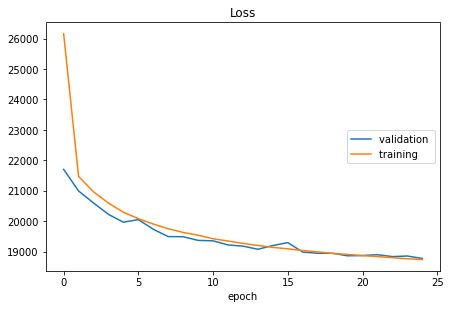

Loss
	validation       	 (min: 18758.186, max: 21989.619, cur: 18771.371)
	training         	 (min: 18650.135, max: 55464900738171.352, cur: 18737.120)


In [36]:
def compiletrain(vae, X_train, X_test):
    vae.compile(optimizer='rmsprop', loss=neg_variational_lower_bound)
    checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)
    history = vae.fit(x=X_train, y=X_train,
                    epochs=25,
                    shuffle=True,
                    batch_size=128,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[PlotLossesKeras(),checkpointer])
    #vae.load_weights('best_weights.hdf5')
    vae.save('model_vae_v1.h5') #isto não funciona devido à layer de sampling
    return vae, history

vae = compiletrain(vae, X_train, X_test)

# VAE_use_model

In [0]:
import keras
from keras import backend as K
#from keras import layers
from keras.layers import Input, Dense, Flatten, Conv2D, Reshape, Conv2DTranspose, Lambda
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.utils import np_utils
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from livelossplot import PlotLossesKeras
%matplotlib inline

In [0]:
##para melhor gestão memória GPU por parte do tensorflow
#def set_keras_backend(backend):
#    print("A acertar o backend e libertar memória da grafica")
#    if K.backend() != backend:
#        os.environ['KERAS_BACKEND'] = backend
#        importlib.reload(K)
#        assert K.backend() == backend
#    if backend == "tensorflow":
#        K.get_session().close()
#        cfg = K.tf.ConfigProto()
#        1cfg.gpu_options.allow_growth = True
#        #cfg.gpu_options.allocator_type = 'BFC'
#        K.set_session(K.tf.Session(config=cfg))
#def limit_mem():
#    K.get_session().close()
#    cfg = K.tf.ConfigProto()
#    cfg.gpu_options.allow_growth = True
#    K.set_session(K.tf.Session(config=cfg))
#
#set_keras_backend("tensorflow")

(60000, 28, 28)


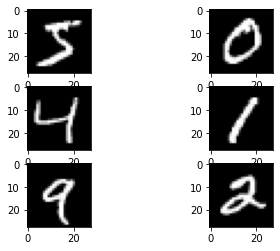

shape[0]:  60000
shape antes:  (60000, 28, 28)
shape depois:  (60000, 28, 28, 1)


In [36]:
def load_mnist_dataset(path='mnist.npz'):
    #path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
# Visualizar 6 imagens do mnist numa escala de cinzentos

def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()

def data_preparation_2D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][largura * altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    #y_train = np_utils.to_categorical(y_train)
    #y_test = np_utils.to_categorical(y_test)
    num_classes = 10 # y_test.shape[1]
    return X_train, X_test, y_train, y_test, num_classes

def data_preparation_1D():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
    num_pixels = X_train.shape[1] * X_train.shape[2] #ou np.prod(X_train.shape[1:])
    X_train = X_train.reshape(len(X_train), num_pixels) #faz o (28,28) = 784
    X_test = X_test.reshape(len(X_test), num_pixels)
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print(X_train.shape)
    print(X_test.shape)
    return X_train, X_test, y_train, y_test, num_classes
#acrescentar ruido nas imagens



#X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
#X_train, X_test, y_train, y_test, num_classes = data_preparation_1D()
X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
#X_train_ruido, X_test_ruido, y_train, y_test, num_classes = data_preparation_1D_ruido()

In [37]:
def create_encoder():
    input_image= Input(shape=(28, 28, 1)) #imagens do MNIST
    encoded1 = Conv2D(32, 3, padding='same', activation='relu')(input_image)
    encoded2 = Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(encoded1)
    encoded3 = Conv2D(64, 3, padding='same', activation='relu')(encoded2)
    encoded4 = Conv2D(64, 3, padding='same', activation='relu')(encoded3)
    encoded5 = Flatten()(encoded4)
    encoded6 = Dense(32, activation='relu')(encoded5)
    t_mean = Dense(2)(encoded6) #o 2 refere-se à dimensão do latent space
    t_log_var = Dense(2)(encoded6)
    #ver documentação do keras:
    #Output of the created model are the sufficient statistics
    #of the variational distriution q(t|x;phi), mean and log variance.
    encoder = Model(inputs=input_image, outputs=[t_mean, t_log_var], name='encoder')
    return encoder

def create_decoder():
    decoder_input = Input(shape=(2,)) #o 2 refere-se à dimensão do latent space (samplin
    decoded1 = Dense(12544, activation='relu')(decoder_input) #12544 = 14*14*64
    decoded2 = Reshape((14, 14, 64))(decoded1)
    decoded3 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(decoded2)
    decoded4 = Conv2D(1, 3, padding='same', activation='sigmoid')(decoded3)
    #Outputs são imagens com shape (28, 28, 1) onde o valor de cada pixel corresponde à
    decoder = Model(inputs=decoder_input, outputs=decoded4, name='decoder')
    return decoder
    

encoder = create_encoder()
decoder = create_decoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### DECODER #################")
decoder.summary() 


############### ENCODER #################
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 32)   320         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 14, 14, 64)   18496       conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 14, 14, 64)   36928       conv2d_17[0][0]                  
_________________________________________________

In [38]:
def sample(args):
    '''
    Draws samples from a standard normal and scales the samples with
    standard deviation of the variational distribution and shifts them
    by the mean.
    Args: sufficient statistics of the variational distribution.
    Returns: Samples from the variational distribution.
    '''
    t_mean, t_log_var = args
    t_sigma = K.sqrt(K.exp(t_log_var))
    epsilon = K.random_normal(shape=K.shape(t_mean), mean=0., stddev=1.)
    return t_mean + t_sigma * epsilon

def create_sampler(): #Creates a sampling layer.
    return Lambda(sample, name='sampler') #Lambda refer-se ao layer.Lambda

def create_vae():
    input_image = Input(shape=(28, 28, 1))
    t_mean, t_log_var = encoder(input_image)
    t = sampler([t_mean, t_log_var])
    t_decoded = decoder(t)
    vae = Model(input_image, t_decoded, name='vae')
    return vae, t_mean, t_log_var
    
sampler = create_sampler()
vae,t_mean, t_log_var = create_vae()
print("\n############### VARIATIONAL AUTOENCODER #################")
vae.summary()


############### VARIATIONAL AUTOENCODER #################
Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 494244      input_12[0][0]                   
__________________________________________________________________________________________________
sampler (Lambda)                (None, 2)            0           encoder[1][0]                    
                                                                 encoder[1][1]                    
__________________________________________________________________________________________________
decoder (Model)                 (None

In [0]:
def neg_variational_lower_bound(input_image, t_decoded):
    '''
    Negative variational lower bound used as loss function
    for training the variational auto-encoder.
    Args: input_image: input images
    t_decoded: reconstructed images
    '''
    # Reconstruction loss
    rc_loss = K.sum(K.binary_crossentropy(K.batch_flatten(input_image), K.batch_flatten(t_decoded)), axis=-1)
    # Regularization term (KL divergence)
    kl_loss = -0.5 * K.sum(1 + t_log_var - K.square(t_mean) - K.exp(t_log_var), axis=-1)
    # Average over mini-batch
    return K.mean(rc_loss + kl_loss)

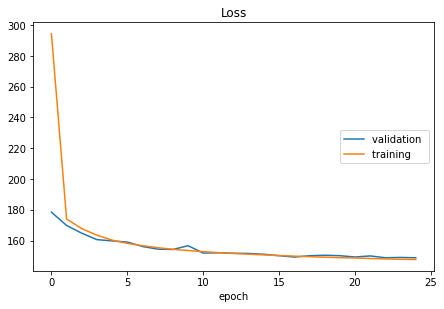

Loss
	validation       	 (min:  148.816, max:  178.441, cur:  148.816)
	training         	 (min:  147.697, max:  294.336, cur:  147.697)


In [40]:
def compiletrain(vae, X_train, X_test):
    vae.compile(optimizer='rmsprop', loss=neg_variational_lower_bound)
    checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)
    history = vae.fit(x=X_train, y=X_train,
                      epochs=25,
                      shuffle=True,
                      batch_size=128,
                      validation_data=(X_test, X_test),
                      verbose=0,
                      callbacks=[PlotLossesKeras(),checkpointer])
    #vae.load_weights('best_weights.hdf5')
    vae.save('model_vae_v1.h5') #isto não funciona devido à layer de sampling
    return vae, history

nvae = compiletrain(vae, X_train, X_test)

X_test: (10000, 28, 28, 1)
t_mean_test: (10000, 2)
t_log_var_test: (10000, 2)


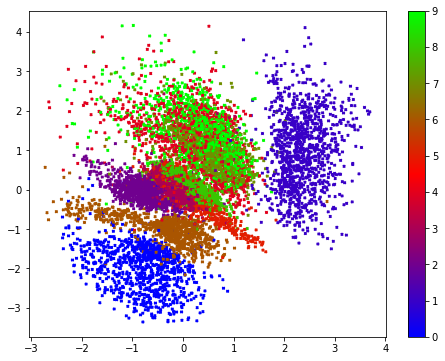

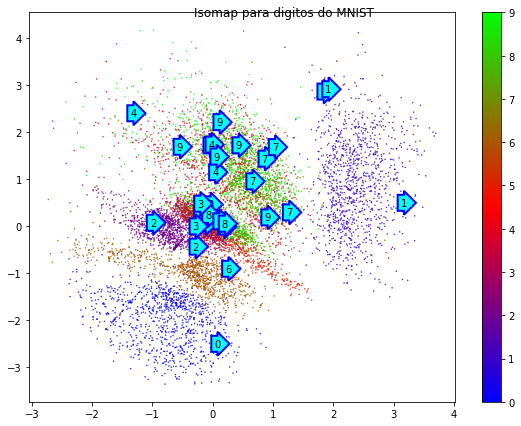

In [41]:
def plot_t_test(t_test,y_test):
# grafico do latent vector t_test colorido pelos valores dos digitos nas imagens de
    plt.figure(figsize=(8, 6))
    plt.scatter(t_test[:, 0], t_test[:, 1], marker='x', s=6.0, c=y_test, cmap='brg')
    plt.colorbar();
    plt.show()

def plot2_t_test(t_test,y_test):
    plt.figure(figsize=(8, 6))
    plt.scatter(t_test[:, 0], t_test[:, 1],s=0.2, c=y_test, cmap='brg')
    plt.colorbar();
    #plt.set_xticks(())
    #plt.set_yticks(())
    count=0;
    plt.tight_layout()
    plt.suptitle("Isomap para digitos do MNIST")
    for label , x, y in zip(y_test, t_test[:, 0], t_test[:, 1]):
    #anotar na imagem cada 1 em 300 amostras
      if count % 350 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2),va='bottom',ha='left') 
      count = count + 1
    #plt.savefig("mnist_pca.png")
    plt.show()

#vae = load_model('model_vae_v1.h5') #não funciona pois o layers de sampling não é do k
#vae.compile(optimizer='rmsprop', loss=neg_variational_lower_bound) 

#vae.load_weights('best_weights.hdf5')
# Generar os latent vectors dos test set
print("X_test:",X_test.shape)
tt_test = encoder.predict(X_test, batch_size=100)#[0]
t_mean_test=tt_test[0]
t_log_var_test=tt_test[1]
print("t_mean_test:",t_mean_test.shape)
print("t_log_var_test:",t_log_var_test.shape)
plot_t_test(t_mean_test,y_test)
plot2_t_test(t_mean_test,y_test)
#plot_t_test(t_log_var_test,y_test)

 grid_x -- grid_y
 -1.644854 -- -1.644854
 -1.204047 -- -1.204047
 -0.920823 -- -0.920823
 -0.697141 -- -0.697141
 -0.503965 -- -0.503965
 -0.328072 -- -0.328072
 -0.161844 -- -0.161844
 -0.000000 -- -0.000000
 0.161844 -- 0.161844
 0.328072 -- 0.328072
 0.503965 -- 0.503965
 0.697141 -- 0.697141
 0.920823 -- 0.920823
 1.204047 -- 1.204047
 1.644854 -- 1.644854


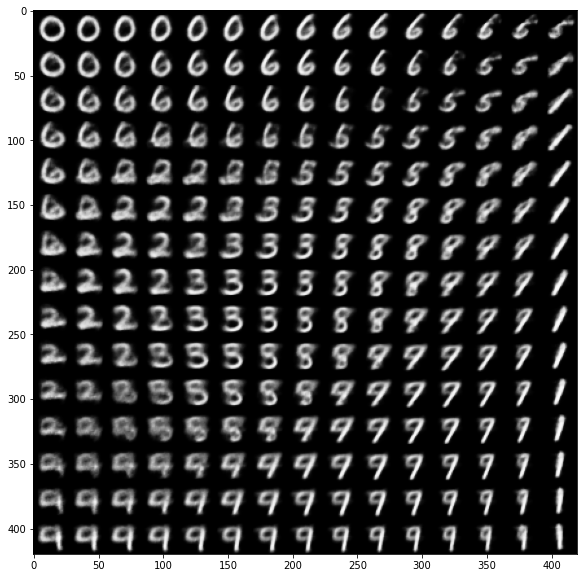

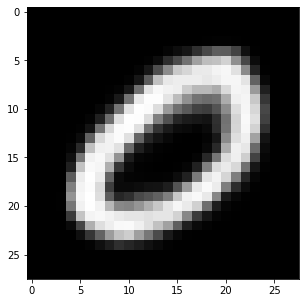

In [42]:
from scipy.stats import norm
def generate_images():
    # Numero de amostras por dimensão
    n = 15
    batch_size=100
    # Construir uma matriz de valores para as latent variable
    # Amostras com intervalo de confiança de 90% da distribuição Gaussiana
    # com densidade de amostragem proporcional à densidade probabilistica
    grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) #lista com n=15 elementos
    grid_y = norm.ppf(np.linspace(0.05, 0.95, n)) #lista com n=15 elementos
    print(" grid_x -- grid_y")
    for i in range(len(grid_x)):
        print(" %f -- %f"%(grid_x[i],grid_y[i]))
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n)) #matriz para n=15*28 por n=15*2
    # fazer o decode para cada elemento da grelha
    for i, yi in enumerate(grid_x): #vai dar tuplos (0,-1.64485363e+00) (1,...)...
        for j, xi in enumerate(grid_y): #vai dar tuplos (0,-1.64485363e+00) (1,...)...
            t_amostra = np.array([[xi, yi]])
            t_amostra = np.tile(t_amostra, batch_size).reshape(batch_size, 2)
            t_decoded = decoder.predict(t_amostra, batch_size=100)
            digit = t_decoded[0].reshape(digit_size, digit_size)
            figure[i*digit_size:(i+1)*digit_size , j*digit_size:(j+1)*digit_size] = digit ###->Aqui<-### é digit?
    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r');
def generate_digit(x,y):
    digit_size = 28
    figure = np.zeros((digit_size, digit_size)) #matriz para n=15*28 por n=15*28
    amostra=np.array([[x, y]])
    t_decoded = decoder.predict(amostra)
    digit = t_decoded[0].reshape(digit_size, digit_size)
    plt.figure(figsize=(5, 5))
    plt.imshow(digit, cmap='Greys_r');

generate_images()
generate_digit(-0.5,-3)

#T2 VAE Fashion

In [0]:
import keras
from keras import backend as K
#from keras import layers
from keras.layers import Input, Dense, Flatten, Conv2D, Reshape, Conv2DTranspose, Lambda
from keras.datasets import fashion_mnist
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.utils import np_utils
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from livelossplot import PlotLossesKeras
%matplotlib inline

4423680/4422102 [==============================] - 2s 1us/step
(60000, 28, 28)


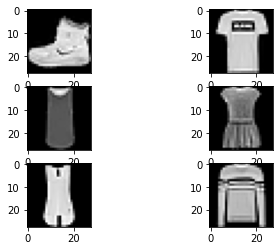

shape[0]:  60000
shape antes:  (60000, 28, 28)
shape depois:  (60000, 28, 28, 1)


In [46]:
def load_mnist_dataset(path='mnist.npz'):
    #path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
# Visualizar 6 imagens do mnist numa escala de cinzentos

def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()

def data_preparation_2D():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][largura * altura]
    print("shape[0]: ",X_train.shape[0])
    print("shape antes: ",X_train.shape)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    print("shape depois: ",X_train.shape)
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    #y_train = np_utils.to_categorical(y_train)
    #y_test = np_utils.to_categorical(y_test)
    num_classes = 10 # y_test.shape[1]
    return X_train, X_test, y_train, y_test, num_classes

def data_preparation_1D():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    print(X_train.shape)
    visualize_mnist(X_train)
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255
    num_pixels = X_train.shape[1] * X_train.shape[2] #ou np.prod(X_train.shape[1:])
    X_train = X_train.reshape(len(X_train), num_pixels) #faz o (28,28) = 784
    X_test = X_test.reshape(len(X_test), num_pixels)
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    print(X_train.shape)
    print(X_test.shape)
    return X_train, X_test, y_train, y_test, num_classes
#acrescentar ruido nas imagens



#X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
#X_train, X_test, y_train, y_test, num_classes = data_preparation_1D()
X_train, X_test, y_train, y_test, num_classes = data_preparation_2D()
#X_train_ruido, X_test_ruido, y_train, y_test, num_classes = data_preparation_1D_ruido()

In [47]:
def create_encoder():
    input_image= Input(shape=(28, 28, 1)) #imagens do MNIST
    encoded1 = Conv2D(32, 3, padding='same', activation='relu')(input_image)
    encoded2 = Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(encoded1)
    encoded3 = Conv2D(64, 3, padding='same', activation='relu')(encoded2)
    encoded4 = Conv2D(64, 3, padding='same', activation='relu')(encoded3)
    encoded5 = Flatten()(encoded4)
    encoded6 = Dense(32, activation='relu')(encoded5)
    t_mean = Dense(2)(encoded6) #o 2 refere-se à dimensão do latent space
    t_log_var = Dense(2)(encoded6)
    #ver documentação do keras:
    #Output of the created model are the sufficient statistics
    #of the variational distriution q(t|x;phi), mean and log variance.
    encoder = Model(inputs=input_image, outputs=[t_mean, t_log_var], name='encoder')
    return encoder

def create_decoder():
    decoder_input = Input(shape=(2,)) #o 2 refere-se à dimensão do latent space (samplin
    decoded1 = Dense(12544, activation='relu')(decoder_input) #12544 = 14*14*64
    decoded2 = Reshape((14, 14, 64))(decoded1)
    decoded3 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(decoded2)
    decoded4 = Conv2D(1, 3, padding='same', activation='sigmoid')(decoded3)
    #Outputs são imagens com shape (28, 28, 1) onde o valor de cada pixel corresponde à
    decoder = Model(inputs=decoder_input, outputs=decoded4, name='decoder')
    return decoder
    

encoder = create_encoder()
decoder = create_decoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### DECODER #################")
decoder.summary() 


############### ENCODER #################
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 32)   320         input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 14, 14, 64)   18496       conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 14, 14, 64)   36928       conv2d_22[0][0]                  
_________________________________________________

In [48]:
def sample(args):
    '''
    Draws samples from a standard normal and scales the samples with
    standard deviation of the variational distribution and shifts them
    by the mean.
    Args: sufficient statistics of the variational distribution.
    Returns: Samples from the variational distribution.
    '''
    t_mean, t_log_var = args
    t_sigma = K.sqrt(K.exp(t_log_var))
    epsilon = K.random_normal(shape=K.shape(t_mean), mean=0., stddev=1.)
    return t_mean + t_sigma * epsilon

def create_sampler(): #Creates a sampling layer.
    return Lambda(sample, name='sampler') #Lambda refer-se ao layer.Lambda

def create_vae():
    input_image = Input(shape=(28, 28, 1))
    t_mean, t_log_var = encoder(input_image)
    t = sampler([t_mean, t_log_var])
    t_decoded = decoder(t)
    vae = Model(input_image, t_decoded, name='vae')
    return vae, t_mean, t_log_var
    
sampler = create_sampler()
vae,t_mean, t_log_var = create_vae()
print("\n############### VARIATIONAL AUTOENCODER #################")
vae.summary()


############### VARIATIONAL AUTOENCODER #################
Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 494244      input_15[0][0]                   
__________________________________________________________________________________________________
sampler (Lambda)                (None, 2)            0           encoder[1][0]                    
                                                                 encoder[1][1]                    
__________________________________________________________________________________________________
decoder (Model)                 (None

In [0]:
def neg_variational_lower_bound(input_image, t_decoded):
    '''
    Negative variational lower bound used as loss function
    for training the variational auto-encoder.
    Args: input_image: input images
    t_decoded: reconstructed images
    '''
    # Reconstruction loss
    rc_loss = K.sum(K.binary_crossentropy(K.batch_flatten(input_image), K.batch_flatten(t_decoded)), axis=-1)
    # Regularization term (KL divergence)
    kl_loss = -0.5 * K.sum(1 + t_log_var - K.square(t_mean) - K.exp(t_log_var), axis=-1)
    # Average over mini-batch
    return K.mean(rc_loss + kl_loss)

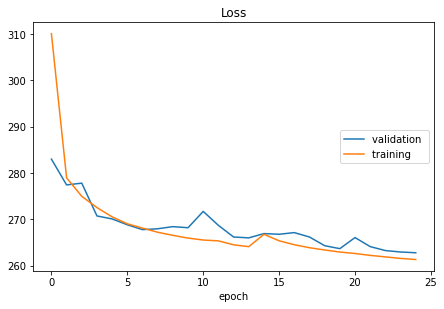

Loss
	validation       	 (min:  148.816, max:  282.993, cur:  262.811)
	training         	 (min:  147.697, max:  310.012, cur:  261.354)


In [50]:
def compiletrain(vae, X_train, X_test):
    vae.compile(optimizer='rmsprop', loss=neg_variational_lower_bound)
    checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)
    history = vae.fit(x=X_train, y=X_train,
                      epochs=25,
                      shuffle=True,
                      batch_size=128,
                      validation_data=(X_test, X_test),
                      verbose=0,
                      callbacks=[PlotLossesKeras(),checkpointer])
    #vae.load_weights('best_weights.hdf5')
    vae.save('model_vae_v1.h5') #isto não funciona devido à layer de sampling
    return vae, history

nvae = compiletrain(vae, X_train, X_test)

X_test: (10000, 28, 28, 1)
t_mean_test: (10000, 2)
t_log_var_test: (10000, 2)


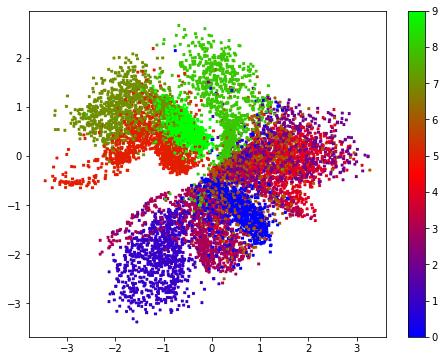

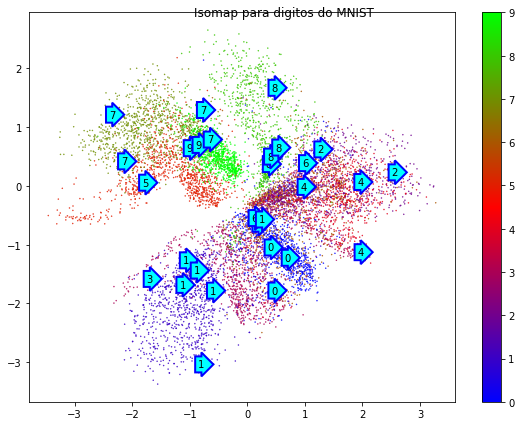

In [51]:
def plot_t_test(t_test,y_test):
# grafico do latent vector t_test colorido pelos valores dos digitos nas imagens de
    plt.figure(figsize=(8, 6))
    plt.scatter(t_test[:, 0], t_test[:, 1], marker='x', s=6.0, c=y_test, cmap='brg')
    plt.colorbar();
    plt.show()

def plot2_t_test(t_test,y_test):
    plt.figure(figsize=(8, 6))
    plt.scatter(t_test[:, 0], t_test[:, 1],s=0.2, c=y_test, cmap='brg')
    plt.colorbar();
    #plt.set_xticks(())
    #plt.set_yticks(())
    count=0;
    plt.tight_layout()
    plt.suptitle("Isomap para digitos do MNIST")
    for label , x, y in zip(y_test, t_test[:, 0], t_test[:, 1]):
    #anotar na imagem cada 1 em 300 amostras
      if count % 350 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2),va='bottom',ha='left') 
      count = count + 1
    #plt.savefig("mnist_pca.png")
    plt.show()

#vae = load_model('model_vae_v1.h5') #não funciona pois o layers de sampling não é do k
#vae.compile(optimizer='rmsprop', loss=neg_variational_lower_bound) 

#vae.load_weights('best_weights.hdf5')
# Generar os latent vectors dos test set
print("X_test:",X_test.shape)
tt_test = encoder.predict(X_test, batch_size=100)#[0]
t_mean_test=tt_test[0]
t_log_var_test=tt_test[1]
print("t_mean_test:",t_mean_test.shape)
print("t_log_var_test:",t_log_var_test.shape)
plot_t_test(t_mean_test,y_test)
plot2_t_test(t_mean_test,y_test)
#plot_t_test(t_log_var_test,y_test)

 grid_x -- grid_y
 -1.644854 -- -1.644854
 -1.204047 -- -1.204047
 -0.920823 -- -0.920823
 -0.697141 -- -0.697141
 -0.503965 -- -0.503965
 -0.328072 -- -0.328072
 -0.161844 -- -0.161844
 -0.000000 -- -0.000000
 0.161844 -- 0.161844
 0.328072 -- 0.328072
 0.503965 -- 0.503965
 0.697141 -- 0.697141
 0.920823 -- 0.920823
 1.204047 -- 1.204047
 1.644854 -- 1.644854


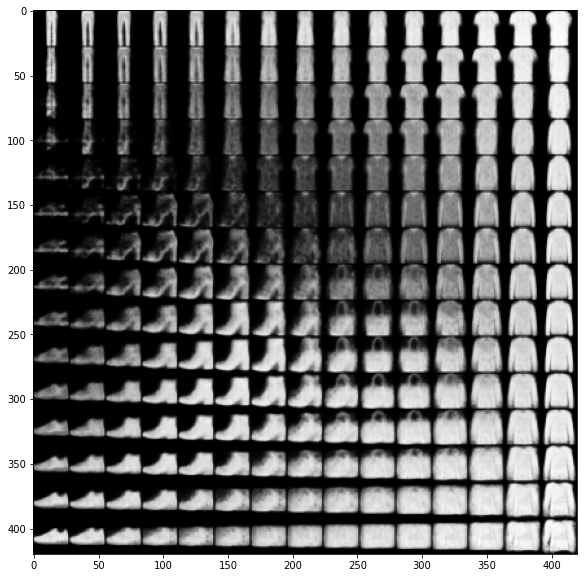

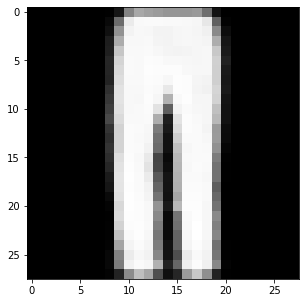

In [52]:
from scipy.stats import norm
def generate_images():
    # Numero de amostras por dimensão
    n = 15
    batch_size=100
    # Construir uma matriz de valores para as latent variable
    # Amostras com intervalo de confiança de 90% da distribuição Gaussiana
    # com densidade de amostragem proporcional à densidade probabilistica
    grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) #lista com n=15 elementos
    grid_y = norm.ppf(np.linspace(0.05, 0.95, n)) #lista com n=15 elementos
    print(" grid_x -- grid_y")
    for i in range(len(grid_x)):
        print(" %f -- %f"%(grid_x[i],grid_y[i]))
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n)) #matriz para n=15*28 por n=15*2
    # fazer o decode para cada elemento da grelha
    for i, yi in enumerate(grid_x): #vai dar tuplos (0,-1.64485363e+00) (1,...)...
        for j, xi in enumerate(grid_y): #vai dar tuplos (0,-1.64485363e+00) (1,...)...
            t_amostra = np.array([[xi, yi]])
            t_amostra = np.tile(t_amostra, batch_size).reshape(batch_size, 2)
            t_decoded = decoder.predict(t_amostra, batch_size=100)
            digit = t_decoded[0].reshape(digit_size, digit_size)
            figure[i*digit_size:(i+1)*digit_size , j*digit_size:(j+1)*digit_size] = digit ###->Aqui<-### é digit?
    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r');
def generate_digit(x,y):
    digit_size = 28
    figure = np.zeros((digit_size, digit_size)) #matriz para n=15*28 por n=15*28
    amostra=np.array([[x, y]])
    t_decoded = decoder.predict(amostra)
    digit = t_decoded[0].reshape(digit_size, digit_size)
    plt.figure(figsize=(5, 5))
    plt.imshow(digit, cmap='Greys_r');

generate_images()
generate_digit(-0.5,-3)